In [ ]:
!pip install qiskit
!pip install pylatexenc

In [3]:
%matplotlib inline

import matplotlib
import pylatexenc
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

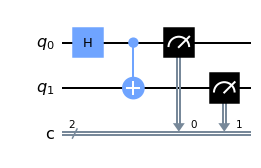

In [4]:
qc = QuantumCircuit(2, 2)
qc.h(0)  # add H gate
qc.cx(0, 1)  # added CNOT gate
qc.measure(range(2), range(2))  # Measure
qc.draw(output='mpl')


{'00': 501, '11': 523}


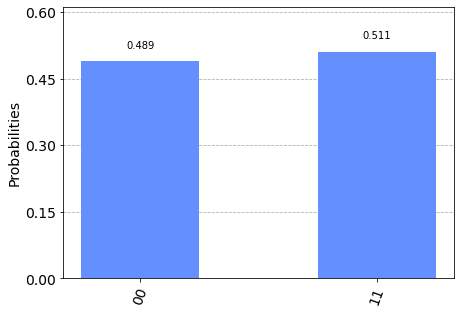

In [5]:
backend = Aer.get_backend('qasm_simulator') 
job = execute(qc, backend, shots=1024) 
result = job.result() 

counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

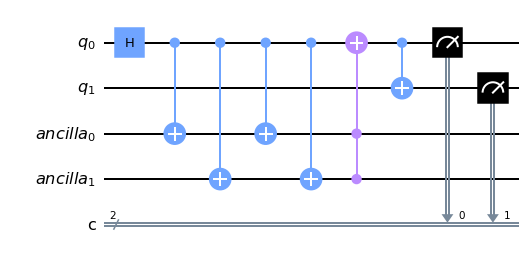

In [72]:
%matplotlib inline

import matplotlib
import pylatexenc
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

qr = QuantumRegister(2, 'q')
anc = QuantumRegister(2, 'ancilla')
cr = ClassicalRegister(2, 'c')

qc = QuantumCircuit(qr, anc, cr)

qc.h(qr[0])              # original part from the first circuit q0

qc.cx(qr[0], anc[0]) # error correction: ancillary qubit flipped conditionaly on the value of first qubit
qc.cx(qr[0], anc[1]) # error correction: ancillary qubit flipped conditionaly on the value of first qubit


#qc.x(qr[0]) # error circuit


qc.cx(qr[0], anc[0]) # error correction: ancillary qubit flipped conditionaly on the value of first qubit
qc.cx(qr[0], anc[1]) # error correction: ancillary qubit flipped conditionaly on the value of first qubit

qc.mcx(list(range(2, 4)), 0)


#qr2 = QuantumRegister(2, 'q')
#qc.barrier(qr2)

qc.cx(0, 1)      # original part from the first circuit (qubit q1)

qc.measure(range(2), range(2))  # Measure



qc.draw(output='mpl')



{'00': 545, '11': 479}


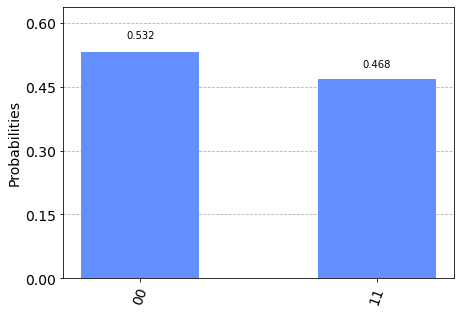

In [73]:

backend = Aer.get_backend('qasm_simulator') 
job = execute(qc, backend, shots=1024) 
result = job.result() 

counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)


[2]